  Install Libraries

Import Libraries

In [50]:

import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import os

Import Video

In [25]:
files = os.listdir('macp')

In [26]:
image_size = cv2.imread(f'macp/{files[0]}', cv2.IMREAD_GRAYSCALE)
print(image_size.shape)

(960, 1280)


Get Random Frames

In [44]:
n_frames = 100
frames = []
frames_idx = []
for i in range(0, n_frames):
    index = random.randint(0, len(files))
    frames_idx.append(index)
    img = cv2.imread(f'macp/{files[index]}',  cv2.IMREAD_GRAYSCALE)
    frames.append(img)

In [45]:
print(frames_idx)

[3345, 1543, 10019, 9647, 5689, 2913, 3302, 5438, 8386, 3681, 9816, 8472, 2702, 2961, 8023, 1940, 3761, 5341, 4345, 5621, 5389, 4207, 8325, 10673, 9009, 10753, 10983, 9502, 2193, 2501, 5302, 7612, 8561, 2101, 7607, 4946, 4514, 540, 10105, 3411, 7096, 9769, 54, 7693, 8970, 1797, 8930, 9413, 11520, 4999, 5413, 10616, 9641, 8584, 10289, 5473, 5014, 9151, 23, 10810, 7406, 10085, 964, 5373, 2319, 3822, 774, 5795, 9302, 3000, 6324, 481, 10626, 481, 1765, 1986, 8814, 6002, 6911, 3013, 846, 11503, 68, 8790, 5365, 7110, 3378, 9285, 7901, 7201, 10152, 1722, 9387, 10430, 9500, 4884, 3653, 5690, 11047, 10447]


In [46]:
background = np.zeros_like(image_size) 
background.shape

(960, 1280)

Display randomly selected frames

In [41]:
# for i in frames:
#     plt.imshow(i)
#     plt.show()

In [ ]:
%time
# for colored background
for x in range(0, image_size.shape[1]):
    for y in range(0, image_size.shape[0]):
        count = dict()
        for frame in frames:
            pixel = frame[y,x]
            key = ' '.join([str(n) for n in pixel])
            if key not in count.keys():
                count[key] = 1
            else:
                count[key] += 1
        max = 0
        for j in count.keys():
            if count[j] > max:
                max = count[j]
                entry = j
        entry = entry.split(' ')
        entry = [int(n) for n in entry]
        background[y, x, :] = np.array(entry)

        

print('done')

In [47]:
%time
# for grayscale
for x in range(0, image_size.shape[1]):
    for y in range(0, image_size.shape[0]):
        count = dict()
        for frame in frames:
            pixel = frame[y,x]
            key = pixel
            if key not in count.keys():
                count[key] = 1
            else:
                count[key] += 1
        max = 0
        for j in count.keys():
            if count[j] > max:
                max = count[j]
                entry = j
        background[y, x] = entry
print('done')

CPU times: total: 0 ns
Wall time: 0 ns
done


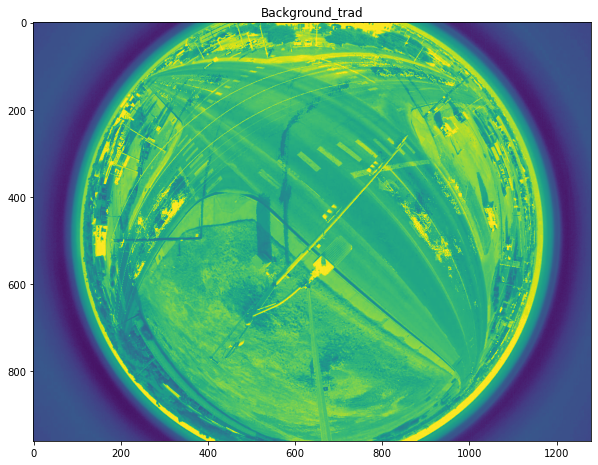

In [48]:
plt.figure(figsize=(10,10))
plt.imshow(background)
plt.title("Background_trad")
plt.show()

In [49]:
cv2.imwrite(f'Background_marc.jpg',background)

True